In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats

In [32]:
#Função para ler os arquivos de solução
def ler_entrada(nome_arquivo):
    caixas = {}
    with open(nome_arquivo, 'r') as arquivo:
        contador = 0
        for linha in arquivo:
            linha = linha.strip()
            linha = linha.split(" ")
            if contador == 0:
                comprimento_container = int(linha[0])
                altura_container = int(linha[1])
                pass
            if contador == 1:
                n = int(linha[0])
                pass
            if contador > 1 and contador <= n + 1:
                caixas[int(linha[0])] = [int(linha[1]), int(linha[2]), int(linha[3])]
                pass
            contador+= 1
    return comprimento_container, altura_container, caixas

In [28]:
#Transformando lista raw de exemplos de 3 tipos em varios arquivos
file = '../lista_inputs_raw_3tipos.txt'
repositorio = '../inputs/3tipos'
file_n = 0
with open(file, 'r') as f:
    contador = 0
    for i in f:
        if contador >= 2 and contador <= 6:
            linha = i.split(" ")
            if contador == 2:
                linha = linha[1:3]
                linha = ' '.join(linha) + '\n'
            if contador == 3:
                linha = linha[1]
            if contador == 4 or contador == 5 or contador == 6:
                linha = [linha[1],linha[2],linha[4],linha[8]]
                linha = ' '.join(linha)
            with open(f'{repositorio}/input_{file_n}.txt', 'a') as f2:
                f2.write(linha)
        if contador == 6:
            contador = 0
            file_n += 1
        contador += 1


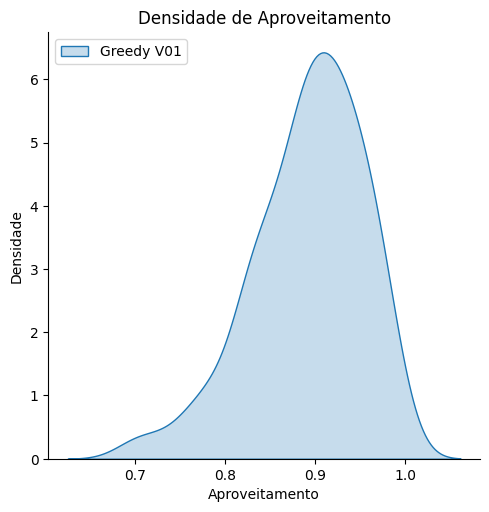

In [61]:
#Analisando Resultado de Greedy V01
resultados = pd.DataFrame(columns=['input','aproveitamento'])
for i in range(100):
    comprimento_container,altura_container,descricao_caixas = ler_entrada(f'../inputs/3tipos/input_{i}.txt')
    #Calcular Área Total do Container
    area_total = comprimento_container*altura_container
    area_ocupada = 0

    #Ler Solução
    solucao = pd.read_csv(f'../outputs/greedy_v01/3tipos/output_{i}.txt', sep=' ', header=None)
    tipos = descricao_caixas.keys()

    for j in range(len(solucao)):
        caixa = descricao_caixas[solucao[0][j]]
        comprimento_caixa = caixa[0]
        altura_caixa = caixa[1]
        area_caixa = comprimento_caixa*altura_caixa
        area_ocupada += area_caixa

    aproveitamento = area_ocupada/area_total
    resultados.loc[len(resultados)] = [f'input_{i}', aproveitamento]
media = resultados['aproveitamento'].mean()
desvio_padrao = resultados['aproveitamento'].std()
# Gráfico de densidade com Seaborn
sns.displot(resultados['aproveitamento'], kind='kde', fill=True,label='Greedy V01')

# Personalização e exibição da legenda
plt.legend(loc='upper left')
plt.title("Densidade de Aproveitamento")
plt.xlabel("Aproveitamento")
plt.ylabel("Densidade")
plt.show()
resultados.to_csv('../resultados_modelos/greedy_v01_3tipos.csv', index=False)